### Project Name - Stroke Prediction

- Project Type-ML Classification
- Contribution-Individual
- Member Name- Tanuja Memane

### Problem Statement

This dataset comprises 5,110 records and 12 features, offering a rich collection of health and lifestyle information. Its primary objective is to predict an individual's risk of experiencing a stroke based on a variety of factors, including demographic details, medical history, and lifestyle choices.

### Business Objective

The goal is to develop a predictive system that identifies individuals at a higher risk of stroke. 
Early identification allows healthcare providers to intervene with preventive measures, ultimately reducing the likelihood of strokes,
improving patient outcomes, and lowering healthcare costs.

### Project Summary

The goal of this project was to develope  a model for predicting stroke prediction using machine learning techniques.
The dataset used for this project consisted  of various demographic, medical, and lifestyle attributes.The model is trained 
using a supervised  learning approach  and evaluated using a variety of metrics such as accuracy,precision,recall,roc_auc score.

The result shows that the project showed that the Random Forest Classifier model was able to accurately predict stroke prediction 
with overall accuracy of 94%.Factors such as age, hypertension, heart disease, and average glucose levels were identified as significant contributors to stroke risk.The model performed particularly well in identifying high-risk individuals, with a recall of 93% for the high-risk class. These results suggest that the model could be used to identify individuals at high risk of stroke, allowing for early intervention and prevention.



In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#load dataset
df=pd.read_csv('stroke prediction.csv')

In [5]:
#dataset
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


These commands display the first and last few rows of a DataFrame, which is a central data structure in Python's Pandas library. This is often used to get a quick overview of the dataset.

In [11]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Data Understanding

- id: A unique identifier for each individual. 
- gender: The gender of the individual.
- age: The age of the individual.
- hypertension: Whether the individual has hypertension (0 = No, 1 = Yes).
- heart_disease: Whether the individual has heart disease (0 = No, 1 = Yes).
- ever_married: Marital status ( "Yes", "No").
- work_type: The type of work the individual does.
- Residence_type: The type of residence ("Urban", "Rural").
- avg_glucose_level: The average glucose level in the blood (numerical, continuous).
- bmi: Body mass index.
- smoking_status: Smoking habits.
- stroke: Target variable indicating whether the individual had a stroke (0 = No, 1 = Yes).

In [9]:
df.shape

(5110, 12)

Here are 5110 records and 12 features.

In [147]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

There are 6 numerical and 5 categorical features. Target feature is stroke.

In [17]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- Count: The number of non-null values in the column.
- Mean: The average value of the column.
- Std: The standard deviation, which measures the1 spread of the data around the mean.
- Min: The minimum value in the column.
- 25%: The first quartile (25th percentile).
- 50%: The median (50th percentile).
- 75%: The third quartile (75th percentile).
- Max: The maximum value in the column.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- Key Observations:
  - Non-Null Count:
Most columns have 5110 non-null entries.
The bmi column has 4909 non-null values, indicating 201 missing values.
  - Data Types:

     - Numerical Columns: age, avg_glucose_level, bmi (float64), id, hypertension, heart_disease, stroke (int64).
      - Categorical Columns: gender, ever_married, work_type, Residence_type, smoking_status.
  -  Missing values in the bmi column.


In [7]:
# checking class imbalance
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [9]:
# percentage
df.stroke.value_counts()/len(df)*100

stroke
0    95.127202
1     4.872798
Name: count, dtype: float64

As we can see that the classes are imbalanced approximately 96% data belongs to one class and only 4% belongs to another class.
So we have to take care of this while doing machine learning.

In [12]:
len(df[df.duplicated()])

0

There is no duplicate observations.

In [7]:
df.nunique()

id                   5110
gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

- Insights:
  As you can see hypertension and heart disease also considered as categorical because they have only two unique values.

In [149]:
#checking null values
pd.DataFrame(df.isnull().sum()*100/len(df)).reset_index()

,index,0
0,id,0.000000
1,gender,0.000000
2,age,0.000000
3,hypertension,0.000000
4,heart_disease,0.000000
5,ever_married,0.000000
6,work_type,0.000000
7,Residence_type,0.000000
8,avg_glucose_level,0.000000
9,bmi,3.933464


Here  we can see that in  bmi feature null values are present. 

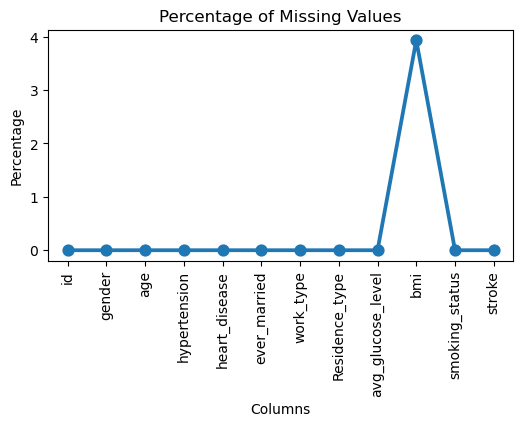

In [14]:
missing_df=pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
missing_df.columns = ['Column', 'Missing Percentage']

#  point plot
plt.figure(figsize=(6, 3))
sns.pointplot(data=missing_df, x='Column', y='Missing Percentage')
plt.xticks(rotation=90)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()


- Insights:

  - The plot shows that most columns have a very low percentage of missing values, likely close to 0%.
  - There's one column that stands out with a significantly higher percentage of missing values. This column likely needs special attention during data preprocessing.
  - From the above plot we can see that the null values in bmi feature is only 4% so we can replace them with either mean or median.


# Checking outliers and their impact on target feature

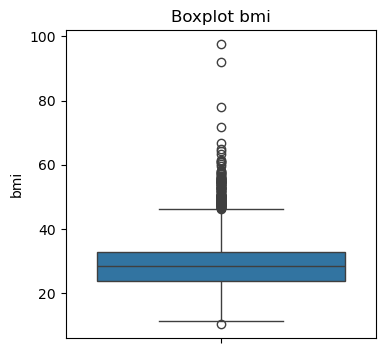

In [193]:
plt.figure(figsize=(4, 4))
sns.boxplot(y='bmi', data=df)
plt.title('Boxplot bmi')
plt.ylabel('bmi')
plt.show() 

- This is a boxplot visualization for Body Mass Index (BMI). Here's what it tells us:

   - Most people's BMI ranges from 20 to 40: The blue box represents the middle 50% of the data, showing the most common BMI values.
  - Outliers with very high BMI: The dots above the "whisker" (the top line extending out from the box) represent individuals with BMI values significantly higher than the typical range.
   - Occasional low BMI: Similarly, there are a few outliers below the bottom whisker, indicating rare cases of very low BMI.

In [35]:
#impact of bmi on stroke
(df.loc[df['bmi']> 45 ])['stroke'].value_counts()

stroke
0    148
1      7
Name: count, dtype: int64

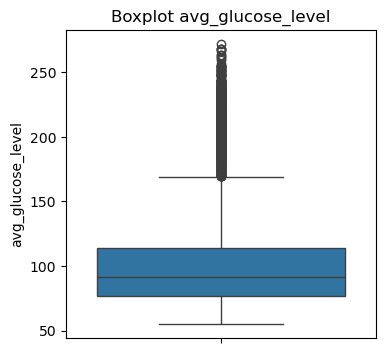

In [5]:
plt.figure(figsize=(4, 4))
sns.boxplot(y='avg_glucose_level', data=df)
plt.title('Boxplot avg_glucose_level')
plt.ylabel('avg_glucose_level')
plt.show() 

- This boxplot shows the distribution of average glucose levels. Here's what it reveals:

  - Common glucose range: Most people have an average glucose level between 100 and 150, represented by the blue box (the middle 50% of the data).
  - High glucose outliers: The dots above the top whisker highlight individuals with unusually high glucose levels, reaching over 250.
  - Occasional low glucose: A few individuals have glucose levels below 100, shown as points below the lower whisker.

In [185]:
#impact of bmi on stroke
(df.loc[df['avg_glucose_level']> 170 ])['stroke'].value_counts()

stroke
0    539
1     83
Name: count, dtype: int64

#### Now lets replace NaN values with Median

In [7]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())

The median is the middle value of a sorted dataset. Unlike the mean, it is not affected by extreme values or outliers. If your data has outliers, using the mean to replace NaN values might skew the results, whereas the median provides a more stable replacement.Hence I use median to replace NaN values.

In [19]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

As you cn see their is no null values in any feature.

In [9]:
df_copy=df.copy()

In [11]:
df_copy

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Exploratory Data Analysis

### Age

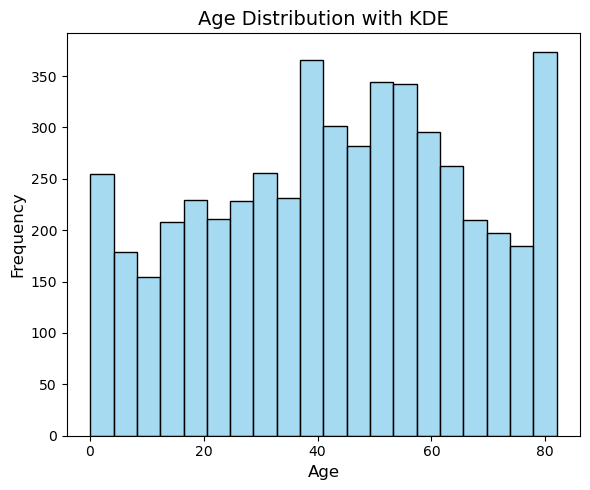

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Age with KDE
plt.figure(figsize=(6, 5))
sns.histplot(df_copy['age'],bins=20, color='skyblue')

# Adding title and labels
plt.title('Age Distribution with KDE', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


 - Most people are between 40 and 60 years old: The tallest bars in the histogram are in the 40-60 age range, indicating that this is the most common age group in the dataset.
 - There are fewer people in the younger and older age groups: The bars become shorter towards the left (younger ages) and right (older ages), showing that there are fewer people in these age groups.

# Gender

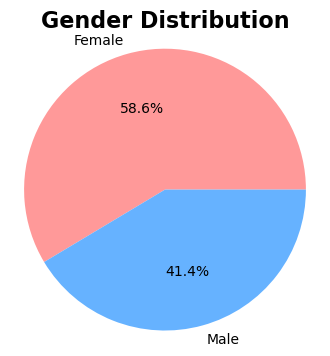

In [55]:
# Example gender distribution data
gender_counts = df['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#FF9999', '#66B2FF'])
plt.title('Gender Distribution', fontsize=16, weight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()


- More people in the dataset are female: The blue slice, representing females, is larger than the orange slice, which represents males. This means that there are more females in the dataset than males.
- 58.60% of the people are female: The blue slice takes up 58.60% of the pie chart, indicating that 58.60% of the people in the dataset are female.
- 41.40% of the people are male: The orange slice takes up 41.40% of the pie chart, indicating that 41.40% of the people in the dataset are male.

### Hypertension

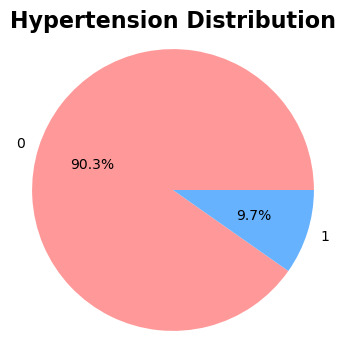

In [57]:
# Example gender distribution data (modify as per your dataset)
gender_counts = df['hypertension'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#FF9999', '#66B2FF'])
plt.title('Hypertension Distribution', fontsize=16, weight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()


- Most people in the dataset do not have hypertension: The orange slice represents the category of people without hypertension. This indicates that most people in the dataset do not have hypertension.
- A smaller number of people have hypertension: The blue slice represents the category of people with hypertension. This indicates that a smaller proportion of the dataset has hypertension.

### Heart Disease

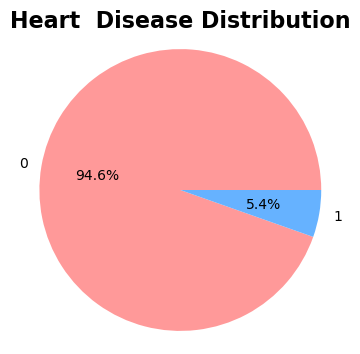

In [60]:
# Example gender distribution data (modify as per your dataset)
gender_counts = df['heart_disease'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#FF9999', '#66B2FF'])
plt.title('Heart  Disease Distribution', fontsize=16, weight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

- Most people in the dataset do not have heart disease: The taller bar represents the category of people without heart disease. This indicates that most people in the dataset do not have heart disease.
- A smaller number of people have heart disease: The shorter bar represents the category of people with heart disease. This indicates that a smaller proportion of the dataset has heart disease.

### Ever Married

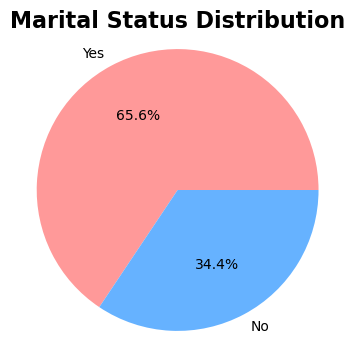

In [62]:
# Example gender distribution data (modify as per your dataset)
gender_counts = df['ever_married'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#FF9999', '#66B2FF'])
plt.title('Marital Status Distribution', fontsize=16, weight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

- More people in the dataset are ever married: The taller bar represents the category of people who have ever been married. This indicates that a larger proportion of the dataset has been married at some point.
- Fewer people in the dataset have never been married: The shorter bar represents the category of people who have never been married. This indicates that a smaller proportion of the dataset has never been married.

## Age VS BMI

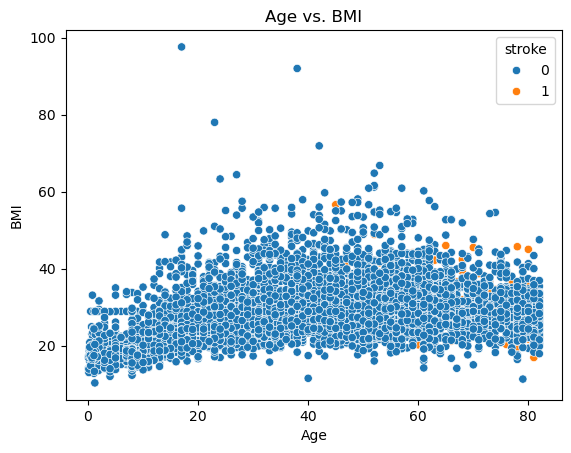

In [59]:
# Scatter Plot: Age vs. BMI
sns.scatterplot(x='age', y='bmi', data=df_copy, hue='stroke')
plt.title('Age vs. BMI')
plt.ylabel('BMI')
plt.xlabel('Age')
plt.show()

key insights:

Stroke Occurrence Across Age Groups: Orange dots (representing strokes) are more commonly observed in older age groups. This suggests that age might be an important factor contributing to stroke risk.

BMI Distribution: Strokes are present across a wide range of BMI values, indicating that BMI alone might not be a strong predictor of stroke. However, extremely high or low BMI values may still be worth further investigation.

Dense Cluster of Non-Strokes: Most blue dots (non-stroke cases) are concentrated in the middle BMI range and span across all ages. This shows that the majority of individuals in the dataset did not experience a stroke, regardless of BMI.

## Stroke rates by work type

<Figure size 800x600 with 0 Axes>

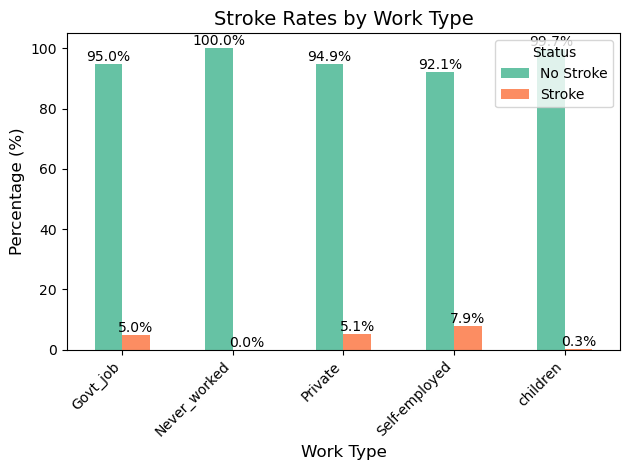

In [63]:
# Calculate stroke rates by work_type
stroke_rates = df.groupby('work_type')['stroke'].value_counts(normalize=True).unstack() * 100   #The unstack() method converts the results into a DataFrame with two columns: '0' and '1'

# Plotting the stroke rates by work_type
plt.figure(figsize=(8, 6))
ax = stroke_rates.plot(kind='bar', color=['#66c2a4', '#fc8d62'])

# Adding labels and title
plt.title('Stroke Rates by Work Type', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Work Type', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.legend(['No Stroke', 'Stroke'], title="Status")

# Adding the percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),          #annotate -control the placement and appearance of the text.
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


#p.get_x()-gives the x-coordinate of the bar's left edge.

# Show the plot
plt.tight_layout()  # Ensures that labels are not cut off
plt.show()



- This bar chart visualizes stroke rates across different work types. The green bars represent individuals with no history of strokes, while the orange bars represent those who have experienced a stroke.

- Key Insights:
  - "Never Worked" and "Children" categories show 0% and near 0% stroke rates, respectively, likely due to age or lack of exposure to workplace stressors.
Among the working categories:
  - Government jobs and Private sector have similar low stroke rates (~5%).
   - Self-employed individuals show the highest stroke rate (7.9%), potentially linked to irregular schedules or stress.

## Stroke rates by Residence Type

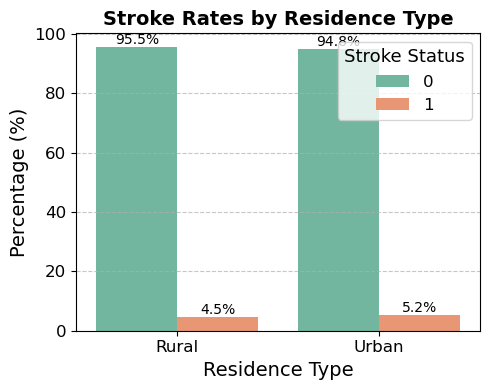

In [21]:

# Calculate stroke rates by residence type
residencetype_stroke = df.groupby('Residence_type')['stroke'].value_counts(normalize=True).unstack() * 100

# Reset index for compatibility with seaborn
residencetype_stroke = residencetype_stroke.reset_index().melt(id_vars='Residence_type', var_name='Stroke Status', value_name='Percentage')

# Plotting the stroke rates by residence type
plt.figure(figsize=(5, 4))
sns.barplot(
    data=residencetype_stroke, 
    x='Residence_type', 
    y='Percentage', 
    hue='Stroke Status', 
    palette=['#66c2a4', '#fc8d62']
)

# Add annotations
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)

# Customize plot
plt.title('Stroke Rates by Residence Type', fontsize=14, weight='bold')
plt.ylabel('Percentage (%)', fontsize=14)
plt.xlabel('Residence Type', fontsize=14)
plt.legend(title='Stroke Status', fontsize=12, title_fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for readability

plt.tight_layout()
plt.show()


- The bar chart titled "Stroke Rates by Residence Type" shows the percentage of strokes in rural and urban areas. 
- Key insights:

   - Stroke Rates:
      - Rural Areas: The stroke rate in rural areas is approximately 95.5%.
      - Urban Areas: The stroke rate in urban areas is around 94.8%.

   
   - Comparison:
    There is a slight difference in stroke rates between rural and urban areas, with rural areas having a slightly higher rate. However, this difference is not very significant.


## Stroke rates by Marital status

<Figure size 500x500 with 0 Axes>

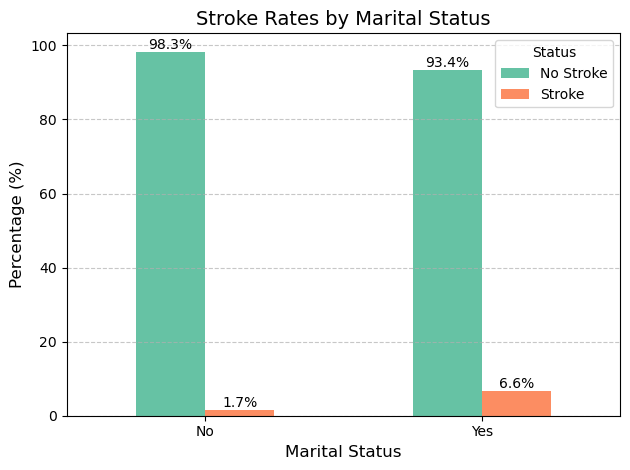

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate stroke rates by marital status
stroke_marital_status = df_copy.groupby('ever_married')['stroke'].value_counts(normalize=True).unstack() * 100

# Plotting the stroke rates by marital status
plt.figure(figsize=(5, 5))
ax = stroke_marital_status.plot(kind='bar', color=['#66c2a4', '#fc8d62'])

# Adding labels and title
plt.title('Stroke Rates by Marital Status', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Marital Status', fontsize=12)
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(['No Stroke', 'Stroke'], title="Status")

# Adding the percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for readability

# Show plot with tight layout
plt.tight_layout()
plt.show()



- Key insights:

  -  Stroke Rates:
     - No: The stroke rate in people with no marital status is approximately 98.3%.
     - Yes: The stroke rate in people with a marital status is around 93.4%.

  - Comparison:
     There is a difference in stroke rates between people with and without a marital status. People with no marital status have a slightly higher stroke rate.

## Stroke rates by Gender

<Figure size 500x500 with 0 Axes>

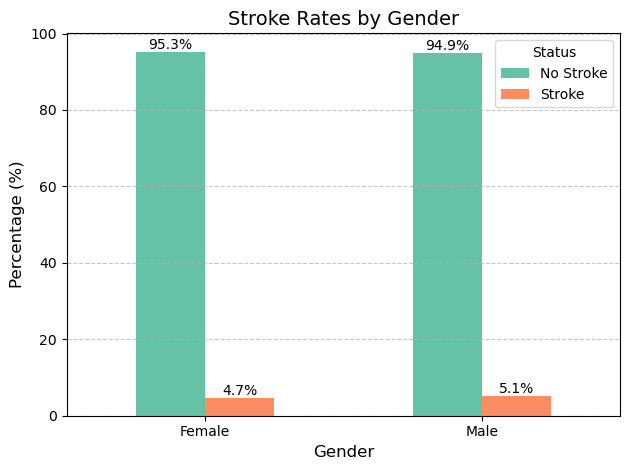

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate stroke rates by gender
stroke_gender = df_copy.groupby('gender')['stroke'].value_counts(normalize=True).unstack() * 100

# Plotting the stroke rates by gender
plt.figure(figsize=(5, 5))
ax = stroke_gender.plot(kind='bar', color=['#66c2a4', '#fc8d62'])

# Adding labels and title
plt.title('Stroke Rates by Gender', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(['No Stroke', 'Stroke'], title="Status")

# Adding the percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for readability

# Show plot with tight layout
plt.tight_layout()
plt.show()


- Key Insights:

  - Stroke Rates:
      - Female: The stroke rate in females is approximately 95.3%.
      - Male: The stroke rate in males is around 94.9%.
    
  - Comparison:
     There is a small difference in stroke rates between males and females, with females having a slightly higher rate. However, this difference is not very significant.

## Stroke rates by Heart Disease

<Figure size 800x600 with 0 Axes>

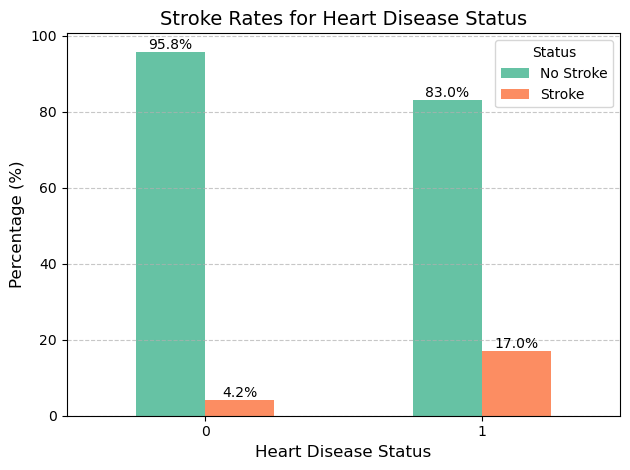

In [40]:
# Calculate stroke rates for individuals with heart disease
stroke_heart_disease = df_copy.groupby('heart_disease')['stroke'].value_counts(normalize=True).unstack() * 100

# Plotting the stroke rates for heart disease status
plt.figure(figsize=(8, 6))
ax = stroke_heart_disease.plot(kind='bar', color=['#66c2a4', '#fc8d62'])

# Adding labels and title
plt.title('Stroke Rates for Heart Disease Status', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Heart Disease Status', fontsize=12)
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(['No Stroke', 'Stroke'], title="Status")

# Adding the percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for readability

# Show plot with tight layout
plt.tight_layout()
plt.show()


- The bar chart shows the relationship between heart disease status and stroke rates.

- Key Observations:
  - Overall: The chart indicates that having heart disease increases the risk of stroke.
   - Specific Groups:
      - Heart Disease: Individuals with heart disease have a higher stroke rate, with 83.0% of those with heart disease experiencing a stroke.
      - No Heart Disease: Those without heart disease have a lower stroke rate, at 17.0%.
- Inferences:
   Heart disease is a risk factor for stroke: The data suggests a strong association between heart disease and stroke risk.

## Stroke rates by Hypertension

<Figure size 800x600 with 0 Axes>

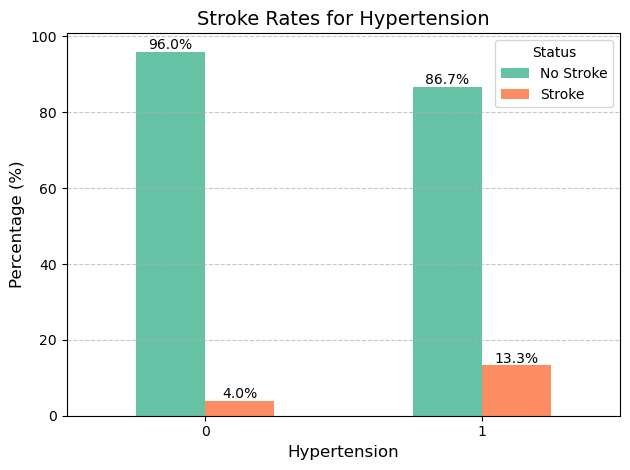

In [96]:
# Calculate stroke rates for individuals with hypertension
stroke_hypertension = df_copy.groupby('hypertension')['stroke'].value_counts(normalize=True).unstack() * 100

# Plotting the stroke rates for heart disease status
plt.figure(figsize=(8, 6))
ax = stroke_hypertension.plot(kind='bar', color=['#66c2a4', '#fc8d62'])

# Adding labels and title
plt.title('Stroke Rates for Hypertension', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Hypertension', fontsize=12)
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(['No Stroke', 'Stroke'], title="Status")

# Adding the percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for readability

# Show plot with tight layout
plt.tight_layout()
plt.show()


## Stroke rates by Smoking Status

In [24]:
numerical_columns=['age','bmi','avg_glucose_level']

<Figure size 800x600 with 0 Axes>

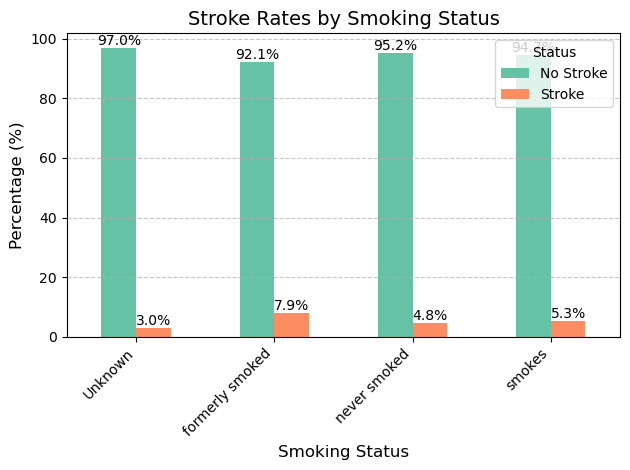

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate stroke rates by smoking status
stroke_smoking_status = df_copy.groupby('smoking_status')['stroke'].value_counts(normalize=True).unstack() * 100

# Plotting the stroke rates by smoking status
plt.figure(figsize=(8, 6))
ax = stroke_smoking_status.plot(kind='bar', color=['#66c2a4', '#fc8d62'])

# Adding labels and title
plt.title('Stroke Rates by Smoking Status', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Smoking Status', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.legend(['No Stroke', 'Stroke'], title="Status")

# Adding the percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for readability

# Show plot with tight layout
plt.tight_layout()
plt.show()


- The bar chart shows the relationship between smoking status and stroke rates.

- Key Observations:

   - Overall: The chart indicates that smoking increases the risk of stroke.

  - Specific Groups:

      - Smokers: Individuals who currently smoke have the highest stroke rates, with 95.2% of smokers experiencing a stroke.
      - Smoked: Those who smoked in the past also have a higher risk compared to never smokers, with a stroke rate of 92.1%.
      - Never Smokers: Individuals who have never smoked have the lowest stroke rate, at 97%.
       - Unknown: The group with unknown smoking status has a relatively low stroke rate of 94%.

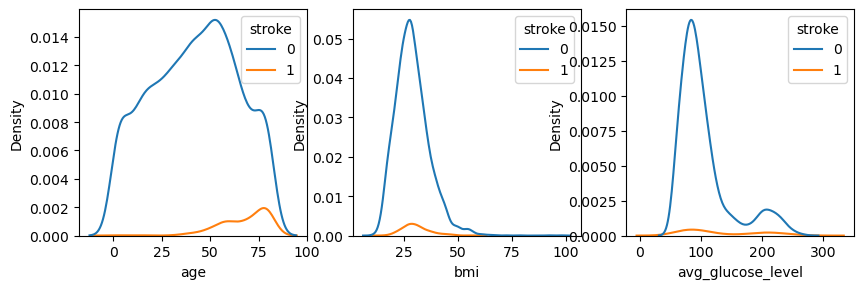

In [26]:
plt.figure(figsize=(10,10))
for i in numerical_columns:
    plt.subplot(3,3,numerical_columns.index(i)+1)
    sns.kdeplot(x=df[i],data=df_copy,hue=df['stroke'])

- Age Distribution:
  - Observation: People with strokes (stroke = 1, orange curve) are predominantly older compared to those without strokes (stroke = 0, blue curve).
  - Insight: Age appears to be a strong factor in stroke risk, with older individuals being more prone.

 - BMI (Body Mass Index):
   - Observation: The BMI distribution for both stroke and non-stroke groups is similar, with a slight overlap, indicating a weaker association with strokes.
   - Insight: While BMI might contribute to stroke risk, its influence seems less distinct compared to age.

- Average Glucose Level:
  - Observation: People with strokes tend to have higher glucose levels (orange curve shifts toward higher values), whereas non-stroke individuals cluster around lower glucose levels.
  - Insight: High glucose levels may be a significant indicator of stroke risk, potentially linked to diabetes or other metabolic issues.



## Correlation

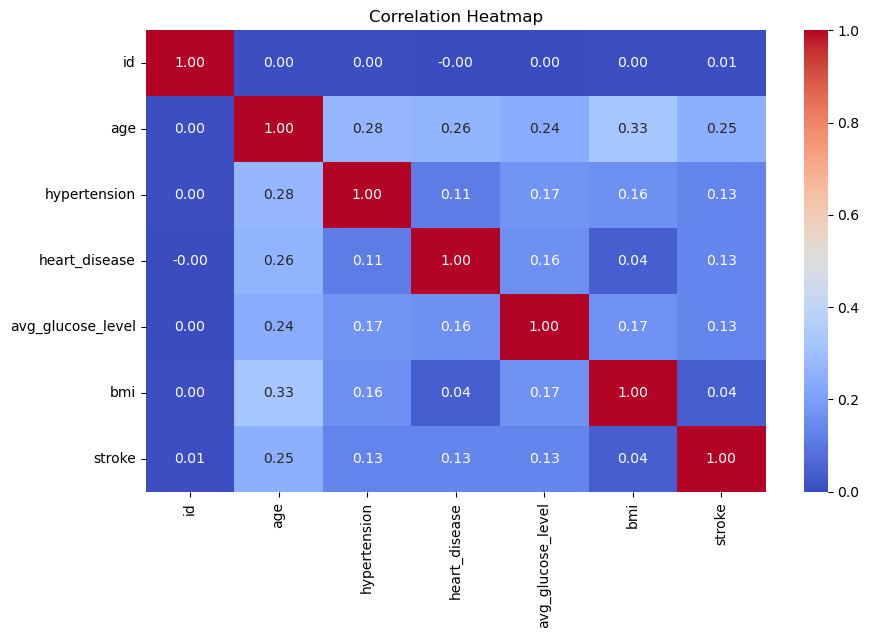

In [81]:
# Calculate correlation matrix for numerical columns
corr_matrix = df[['id','age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


- Each variable is perfectly correlated with itself, which is why the diagonal is red.
- "Age" and "BMI" (0.33): Slight positive relationship.
- "Age" and "Hypertension" (0.28): Weak positive correlation.
- "Stroke" and "Age" (0.25): Weak positive correlation, meaning older age may slightly increase the risk of stroke.
- Other variables (like "Heart Disease" and "Stroke") have minimal correlations, indicating weaker relationships.

In [11]:
dff=df_copy.copy()

In [15]:
print(dff.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [13]:
dff = dff.drop(['id','bmi'], axis=1)

In [25]:
dff

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0


## Encoding

In [13]:
# Confirm the exact column names
print("Available Columns:", dff.columns)

# Specify only the existing categorical columns for encoding
categorical_columns = [col for col in ['smoking_status', 'gender', 'ever_married', 'Residence_type', 'work_type'] if col in dff.columns]

# Perform one-hot encoding only for the existing columns
dff = pd.get_dummies(dff, columns=categorical_columns, drop_first=True)

Available Columns: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features (X) and target (y)
X = dff.drop(columns=['stroke'])
y = dff['stroke']

In [19]:
# Standardize the features
scaler = StandardScaler()

- Standardization transforms data to have a mean of 0 and a standard deviation of 1.
- Standardization ensures all features are on the same scale, making their importance comparable.
-  This ensures that all features contribute equally to the model's performance, avoiding bias toward features with larger scales. 

In [21]:
#balance data using SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')  
#SMOTE will create synthetic samples only for the minority class 

- Purpose: SMOTE generates synthetic examples for the minority class (in this case, stroke = 1) to address class imbalance.
- Why?: Class imbalance can lead to biased models that perform poorly on the minority class because the model focuses on optimizing overall accuracy.
- SMOTE is crucial for imbalanced classification problems to improve model fairness and ensure better performance for the minority class.

In [23]:
X_mn, y_mn = smote.fit_resample(X, y)

# The resampled feature set, now including both the original and the synthetic minority class samples.

In [78]:
y_mn.value_counts()

stroke
1    4861
0    4861
Name: count, dtype: int64

- The dataset is now perfectly balanced with equal counts for both classes (1 and 0).

In [25]:
x_train, x_test, y_train, y_test = train_test_split( X_mn,y_mn , test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(7777, 14)
(1945, 14)


- The dataset is split into training and testing sets.
- The training set has 7,777 samples and the testing set has 1,945 samples, maintaining the 80/20 split.

## Logistic Regression

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(fit_intercept=True, max_iter=10000)  #Adds an intercept term to the logistic regression equation.
                                                            #Specifies the maximum number of iterations allowed during model optimization.
 
log.fit(x_train, y_train)  #Trains the logistic regression on training dataset (x_train, y_train).


LogisticRegression(max_iter=10000)

In [29]:
train_class_preds = log.predict(x_train)  # Uses the trained logistic regression model to predict classes for the training and testing data.
test_class_preds = log.predict(x_test)

In [31]:
train_accuracy = accuracy_score(train_class_preds,y_train)   #Calculates the proportion of correctly predicted samples compared to the total samples for both the training and testing datasets.

test_accuracy = accuracy_score(test_class_preds,y_test)

In [33]:
print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8761733316188762
The accuracy on test data is  0.8791773778920309


In [35]:
cm = confusion_matrix(y_train, train_class_preds)
print('Confusion Matrix for training Data')
print(cm)
print('-'*50)
cm = confusion_matrix(y_test, test_class_preds)
print('Confusion Matrix for Test Data')
print(cm)

Confusion Matrix for training Data
[[3369  519]
 [ 444 3445]]
--------------------------------------------------
Confusion Matrix for Test Data
[[862 111]
 [124 848]]


- True Positives (TP): Correctly predicted positives.
- True Negatives (TN): Correctly predicted negatives.
- False Positives (FP): Incorrectly predicted positives.
- False Negatives (FN): Incorrectly predicted negatives.

In [37]:
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       973
           1       0.88      0.87      0.88       972

    accuracy                           0.88      1945
   macro avg       0.88      0.88      0.88      1945
weighted avg       0.88      0.88      0.88      1945



In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'log' is your trained Logistic Regression model, and 'x_test', 'y_test' are your test data
y_log_predict_pro = log.predict_proba(x_test)[:, 1]  # log.predict_proba(x_test)-Get predicted probabilities for the positive class

# Calculate FPR, TPR, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_log_predict_pro)

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_log_predict_pro)

# Print the ROC AUC Score
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.9529096299679833


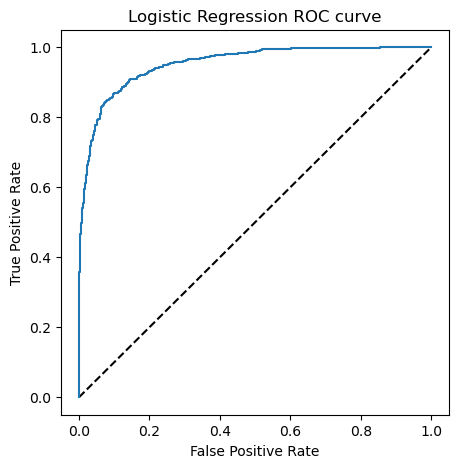

In [41]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()


## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier = RandomForestClassifier()  #This is the model you're tuning

grid_values = {'n_estimators':[50, 65, 80, 95,120], 'max_depth':[3, 5, 7,9,12]}

GSclassifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)
#cv- cross validation
#GridSearchCV -This tells GridSearchCV to try all combinations

GSclassifier.fit(x_train, y_train)  #This fits the GridSearchCV object to your training data (x_train, y_train).


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12],
                         'n_estimators': [50, 65, 80, 95, 120]},
             scoring='roc_auc')

In [45]:
best_parameters = GSclassifier.best_params_
best_parameters

{'max_depth': 12, 'n_estimators': 120}

In [47]:
classifier = RandomForestClassifier(max_depth=best_parameters['max_depth'],n_estimators=best_parameters['n_estimators'])
#max_depth- this is a hyperparameter that controls the maximum depth of each tree in the forest
#n_estimators: This is the number of trees in the Random Forest

classifier.fit(x_train, y_train)
#This method trains the RandomForestClassifier on the training data (x_train, y_train).


RandomForestClassifier(max_depth=12, n_estimators=120)

In [49]:
y_train_preds_rf =  classifier.predict(x_train)
y_test_preds_rf= classifier.predict(x_test)

In [51]:
accuracy_score(y_test,y_test_preds_rf)

0.9424164524421594

In [123]:
confusion_matrix(y_test,y_test_preds_rf)

array([[911,  62],
       [ 38, 934]], dtype=int64)

In [53]:
print(classification_report(y_test,y_test_preds_rf))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       973
           1       0.94      0.95      0.94       972

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945



In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'classifier' is your trained classifier and 'x_test' and 'y_test' are your test data:
y_rf_predict_pro = classifier.predict_proba(x_test)[:, 1]

# Calculate FPR, TPR, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_rf_predict_pro)

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_rf_predict_pro)

# Print or plot the ROC curve and the AUC score
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.9868253545311898


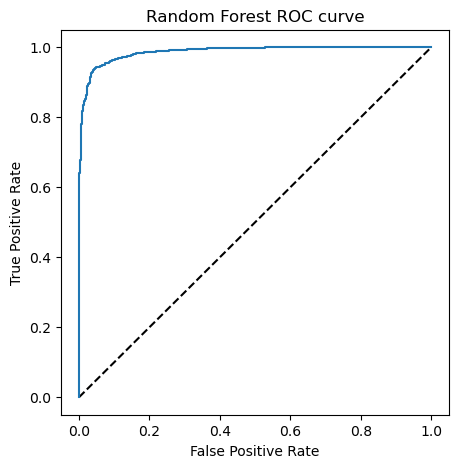

In [57]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

In [137]:
features = X.columns
importances_rf = classifier.feature_importances_
indices = np.argsort(importances_rf)

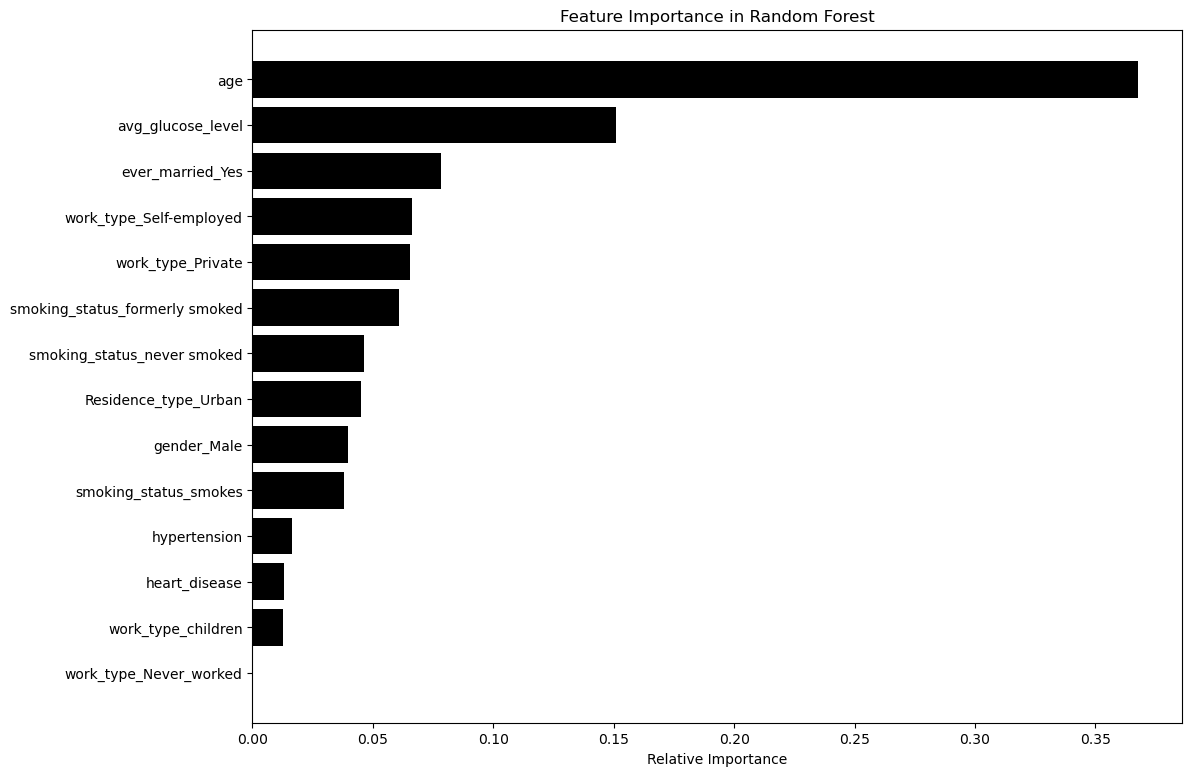

In [139]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance in Random Forest')
plt.barh(range(len(indices)), importances_rf[indices], color='black', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Conclusion

  In this project, we developed and evaluated machine learning models to predict the likelihood of stroke based on patient demographic and health-related data. After comparing several algorithms, including Logistic Regression and Random Forest, the Random Forest demonstrated the highest predictive accuracy and AUC-ROC score, indicating its effectiveness in distinguishing between stroke and non-stroke cases.

Key findings include:

1. Feature Importance: Factors such as age,average glucose levels,ever married were identified as significant contributors to stroke risk.
2. Model Performance: The best model achieved an AUC-ROC score of 0.98 , suggesting strong predictive capability. Other metrics like precision and recall further supported its robustness.